In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
import pickle

In [2]:
root = Path("./results")
filsMNAR = list(root.glob("./Linear_p50/MNARRes/MNAR_linear_*.pkl"))
filsMAR = list(root.glob("./Linear_p50/MARRes/MAR_linear_*.pkl"))
filsEM = list(root.glob("./Linear_p50/EMRes/EM_linear_*.pkl"))
#fils = sorted(fils, key=name2mn)

In [3]:
def path2m(fil):
    m = int(fil.stem.split("m")[1].split("_")[0])
    return m

In [5]:
filsMNAR = sorted(filsMNAR, key=path2m)
filsMAR = sorted(filsMAR, key=path2m)
filsEM = sorted(filsEM, key=path2m)

some parameters 

In [6]:
from collections import defaultdict as ddict

errTsMNAR = ddict(list)
errBsMNAR = ddict(list)
for curFil in filsMNAR:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsMNAR[m].append(errT)
    errBsMNAR[m].append(errb)

In [7]:
errTsMAR = ddict(list)
errBsMAR = ddict(list)
for curFil in filsMAR:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsMAR[m].append(errT)
    errBsMAR[m].append(errb)

In [8]:
errTsEM = ddict(list)
errBsEM = ddict(list)
for curFil in filsEM:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsEM[m].append(errT)
    errBsEM[m].append(errb)

In [11]:
ms = [100, 200, 400, 800, 1600]
errBs = ddict(list)
errTs = ddict(list)
for m in ms:
    errBs["MNAR"].append(np.mean(errBsMNAR[m]))
    errBs["MAR"].append(np.mean(errBsMAR[m]))
    errBs["EM"].append(np.mean(errBsEM[m]))
    
    errTs["MNAR"].append(np.mean(errTsMNAR[m]))
    errTs["MAR"].append(np.mean(errTsMAR[m]))
    errTs["EM"].append(np.mean(errTsEM[m]))

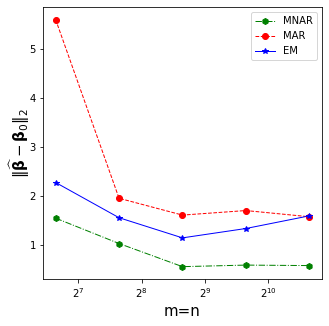

In [21]:
font_y = {"size": 15, "va":"baseline"}
font_x = {"size": 15}
plt.figure(figsize=[5, 5])
# plt.ylim([0, 3.8])
plt.xlabel("m=n", font_x)
plt.ylabel(r"$\Vert\widehat{\mathbf{\beta}} - \mathbf{\beta}_0\Vert_2$", font_y)
plt.xscale("log", base=2)
plt.plot(ms, errBs["MNAR"][:], "g-.h", label="MNAR", linewidth=1)
plt.plot(ms, errBs["MAR"], "r--o", label="MAR", linewidth=1)
plt.plot(ms[:], errBs["EM"][:], "b-*", label="EM", linewidth=1)
plt.legend(loc=1)
plt.savefig("Simu_linear_beta_p50.jpg", bbox_inches="tight")

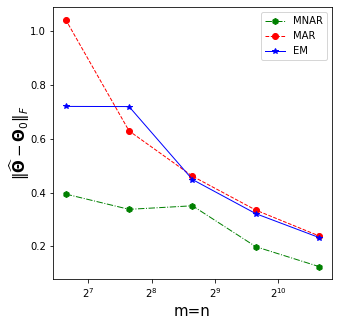

In [22]:
plt.figure(figsize=[5, 5])
plt.xlabel("m=n", font_x)
# plt.ylim([0, 1]) #for p=200 linear
plt.ylabel(r"$\Vert\widehat{\mathbf{\Theta}} - \mathbf{\Theta}_0\Vert_F$", font_y)
plt.plot(ms, errTs["MNAR"], "g-.h", label="MNAR", linewidth=1)
plt.plot(ms, errTs["MAR"], "r--o", label="MAR", linewidth=1)
plt.plot(ms, errTs["EM"], "b-*", label="EM", linewidth=1)
plt.xscale("log", base=2)
plt.legend(loc=1)
plt.savefig("Simu_linear_theta_p50.jpg", bbox_inches="tight")

In [15]:
errBs["MNAR"]

[1.5414114745402958,
 1.0229073307850591,
 0.5501512896172999,
 0.5818631120499054,
 0.5719805524179807]

In [16]:
errTs["MNAR"]

[0.3943217814402379,
 0.3373941307766713,
 0.3506120448229112,
 0.19826405218776064,
 0.1241350402586405]